# Simple titanic death prediction exercise

## Importing helpful librearies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Reading the file

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [4]:
df_test.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## initial data cleaning

#### Redundant columns

In [7]:
df.drop(['Ticket','Name','PassengerId'],axis=1,inplace= True)
df_test.drop(['Ticket','Name'],axis=1,inplace= True)

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Cabin

In [10]:
df.drop(["Cabin"], axis=1,inplace=True)
df_test.drop(["Cabin"], axis=1,inplace=True)

#### Embarkment 

In [11]:
df['Embarked'].fillna('*',inplace=True)
df_test['Embarked'].fillna('*',inplace=True)

In [12]:
df['Embarked'].dtype

dtype('O')

In [13]:
df['Embarked'].unique()

array(['S', 'C', 'Q', '*'], dtype=object)

In [14]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [15]:
embarked_vals = sorted(df['Embarked'].unique())

In [16]:
embarked_dict = dict(zip(embarked_vals,range(len(embarked_vals))))
embarked_dict

{'*': 0, 'C': 1, 'Q': 2, 'S': 3}

In [17]:
df['Embarked'] = df['Embarked'].map(embarked_dict)
df_test['Embarked'] = df_test['Embarked'].map(embarked_dict)

<AxesSubplot:xlabel='Embarked'>

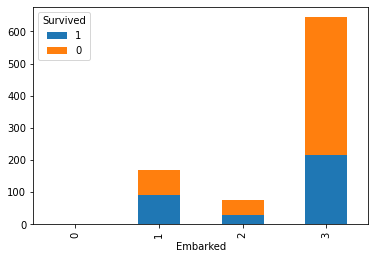

In [18]:
pd.crosstab(df['Embarked'],df['Survived']).iloc[:,::-1].plot.bar(stacked=True)

## Further dada preparation

#### Age

<AxesSubplot:ylabel='Frequency'>

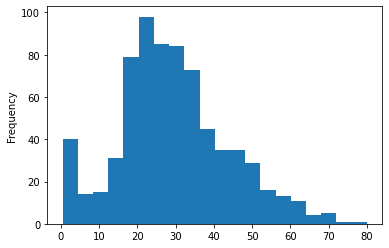

In [19]:
df['Age'].plot.hist(bins=20)

In [20]:
df['Age'] = df.groupby(['Sex','Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))
df_test['Age'] = df_test.groupby(['Sex','Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))

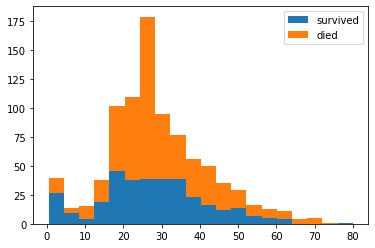

In [21]:
s1 = df[df['Survived']==1]['Age']
s2 = df[df['Survived']==0]['Age']
fig, ax0 = plt.subplots()
ax0.hist([s1,s2], 20, histtype='bar', stacked=True)
ax0.legend(['survived','died'])
plt.show()

#### Passenger class

In [22]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass'>

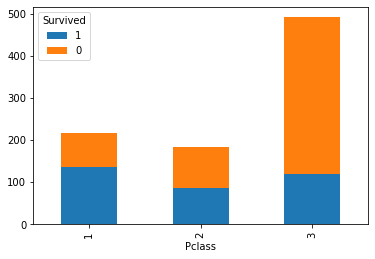

In [23]:
pd.crosstab(df['Pclass'],df['Survived']).iloc[:,::-1].plot.bar(stacked=True)

#### Gender

In [24]:
gender_dict = {'male' : 0, 'female' : 1}
df['Sex']=df['Sex'].map(gender_dict)
df_test['Sex']=df_test['Sex'].map(gender_dict)

df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex'>

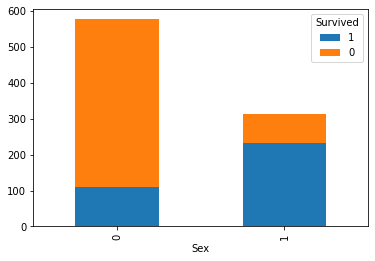

In [25]:
pd.crosstab(df['Sex'],df['Survived']).iloc[:,::-1].plot.bar(stacked=True)

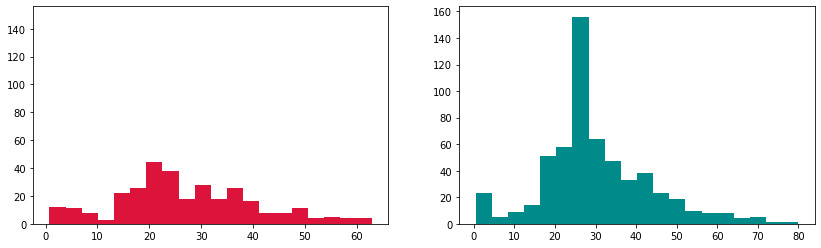

In [26]:
s1 = df[df['Sex']==1]['Age']
s2 = df[df['Sex']==0]['Age']
fig, ax1 = plt.subplots(1,2,figsize=(14,4))
ax1[0].hist(s1, 20, histtype='bar', stacked=True,color='crimson')
y,x,_ = ax1[1].hist(s2, 20, histtype='bar', stacked=True,color='darkcyan')

ax1[0].set_ylim([0,max(y)])
plt.show()

In [27]:
df['FamSize'] = df['SibSp'] + df['Parch']
df_test['FamSize'] = df_test['SibSp'] + df_test['Parch']

In [28]:
df.drop(['SibSp','Parch'], axis=1,inplace=True)
df_test.drop(['SibSp','Parch'], axis=1,inplace=True)

In [29]:
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   FamSize   891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


## Final preparations

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('Survived',axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=69, shuffle=True)

## Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
reg_log = LogisticRegression(max_iter=5000)

In [35]:
reg_log.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [36]:
y_predict = reg_log.predict(X_test)

In [37]:
metrics.accuracy_score(y_predict,y_test)

0.8212290502793296

In [38]:
c_matrix = metrics.confusion_matrix(y_test,y_predict)

In [39]:
print('true negatives : ', c_matrix[0][0] )
print('true positives : ', c_matrix[1][1] )
print('false negatives: ', c_matrix[1][0] )
print('false positives: ', c_matrix[0][1], '\n' )

print('precision: ', c_matrix[1][1]/(c_matrix[1][1]+c_matrix[0][1]))
print('recall   : ', c_matrix[1][1]/(c_matrix[1][1]+c_matrix[1][0]))

true negatives :  96
true positives :  51
false negatives:  16
false positives:  16 

precision:  0.7611940298507462
recall   :  0.7611940298507462


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   FamSize      418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [41]:
result_prediction = reg_log.predict(df_test.drop('PassengerId',axis=1))

In [42]:
df_result_pred = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived': result_prediction})

In [43]:
df_result_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
